## Seaborn library - 고급 그래프 도구
- Matplotlib의 기능과 스타일을 확장한 파이썬 시각화 도구의 고급 버전.
1. 회귀선이 있는 산점도 : regplot()
2. 히스토그램 / 커널 밀도 그래프 : distplot()
* 커널 밀도 함수 : 그래프와 x축 사이 면적이 1이 되도록 그리는 그래프
* kde : 커널 밀도 그래프 옵션
3. 히트맵 : heatmap()
- 2개의 범주형 변수를 x축, y축에 놓고 매트릭스 형태로 분류
4. 범주형 데이터의 산점도 : stripplot():중복 미고려, swarmplot():중복 고려
5. 막대 그래프 : barplot()
6. 빈도 그래프 : countplot()
7. 박스 플롯/바이올린 그래프 : boxplot(), violinplot()
- 범주형 데이터 분포와 주요 통계 지표 제공
8. 조인트 그래프 : jointplot()
- 산점도를 기본으로 표시하고 x, y축에 각 변수에 대한 히스토그램을 동시에 보여주므로 두 변수의 관계와 데이터 분산 정도를 파악하기 용이
9. 조건을 적용하여 화면을 그리드로 분할 : FacetGrid()
10. 이변수 데이터의 분포 : pairplot(), 두개씩 짝지을 수 있는 모든 조합

In [1]:
import numpy as np
import pandas as pd
import json
import seaborn as sns
# sns 내장 데이터셋 titanic
titanic = sns.load_dataset('titanic')
# 데이터셋 살펴보기
print(titanic.head())
print('\n')
print(titanic.info())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-

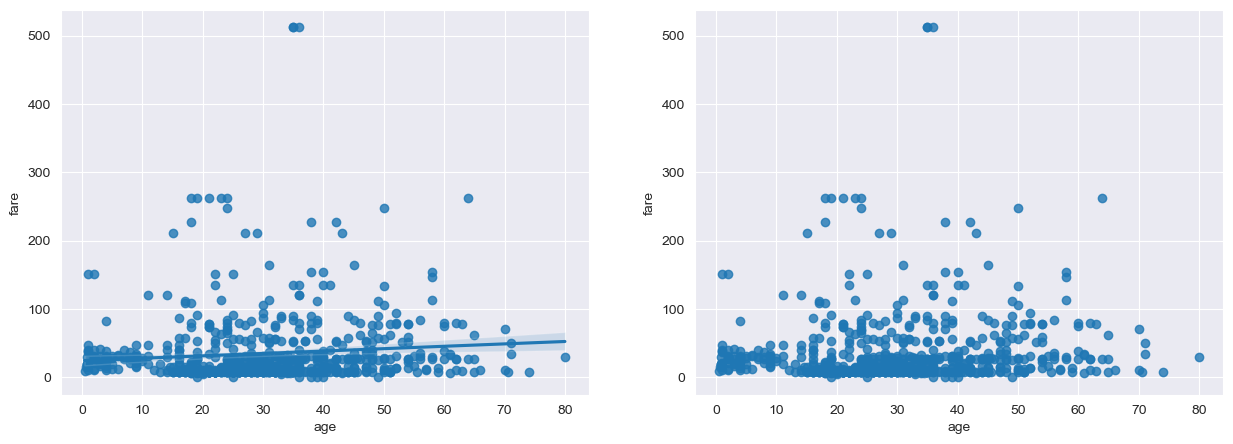

In [2]:
# 회귀선이 있는 산점도
import matplotlib.pyplot as plt
import seaborn as sns

titanic = sns.load_dataset('titanic')
# 스타일 테마 설정(5가지 : darkgrid, whitegrid, dark, white, ticks)
sns.set_style('darkgrid')

# 그래프 객체 생성
fig = plt.figure(figsize = (15,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

# 그래프 그리기 (선형 회귀선 표시)
sns.regplot(x='age', y='fare', data=titanic, ax=ax1)
# 그래프 그리기 (선형 회귀선 미표시)
sns.regplot(x='age', y='fare', data=titanic, ax=ax2, fit_reg=False)

plt.show()

C:\Users\gyw78\AppData\Local\Temp\ipykernel_20100\2331546029.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic['fare'], ax=ax1)
C:\Users\gyw78\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\gyw78\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.u

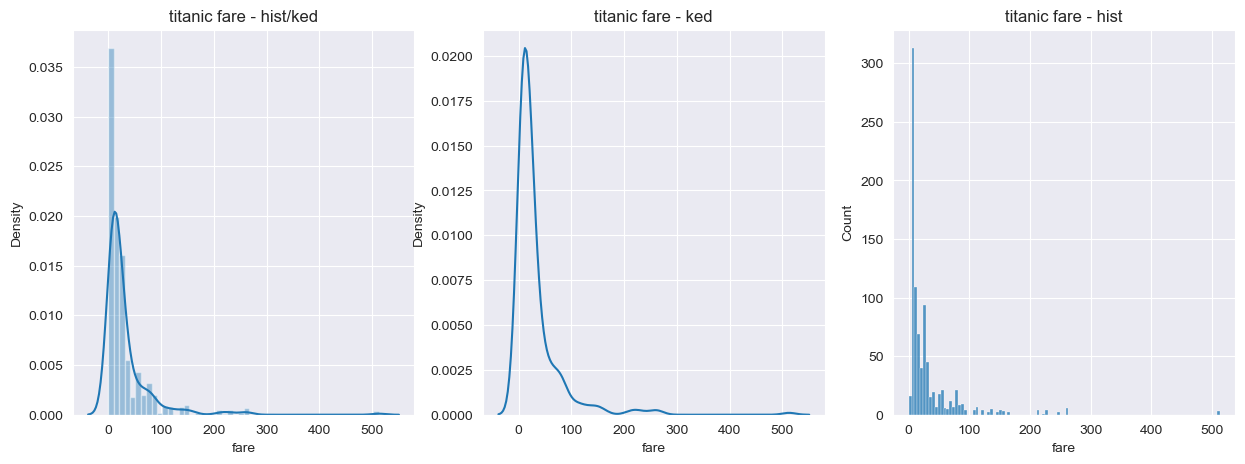

In [3]:
fig = plt.figure(figsize = (15,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

# distplot
sns.distplot(titanic['fare'], ax=ax1)

# kdeplot
sns.kdeplot(titanic['fare'], ax=ax2)

# histplot
sns.histplot(titanic['fare'], ax=ax3)

# 차트 제목 표시
ax1.set_title('titanic fare - hist/ked')
ax2.set_title('titanic fare - ked')
ax3.set_title('titanic fare - hist')

plt.show()

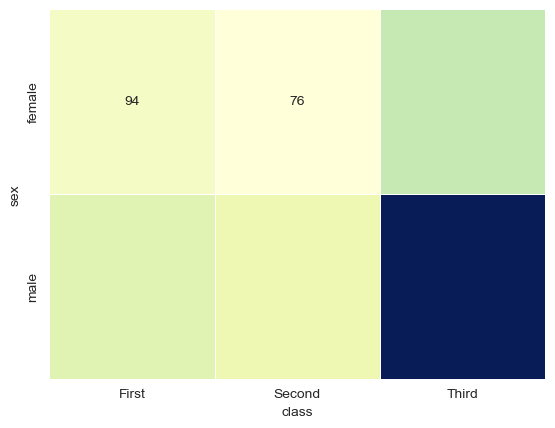

In [4]:
# 히트맵
table = titanic.pivot_table(index=['sex'],
                            columns=['class'], aggfunc='size')
# sex 열 : 행 인덱스, 나머지 열 : 열 인덱스
# aggfunc = 'size' 데이터 값의 크기를 기준으로 집계.
# 히트맵 그리기
sns.heatmap(table, annot=True, fmt='d', cmap = 'YlGnBu',
            linewidth=.5, cbar=False)

plt.show()

범주형 데이터의 산점도

C:\Users\gyw78\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\gyw78\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\gyw78\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\gyw78\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

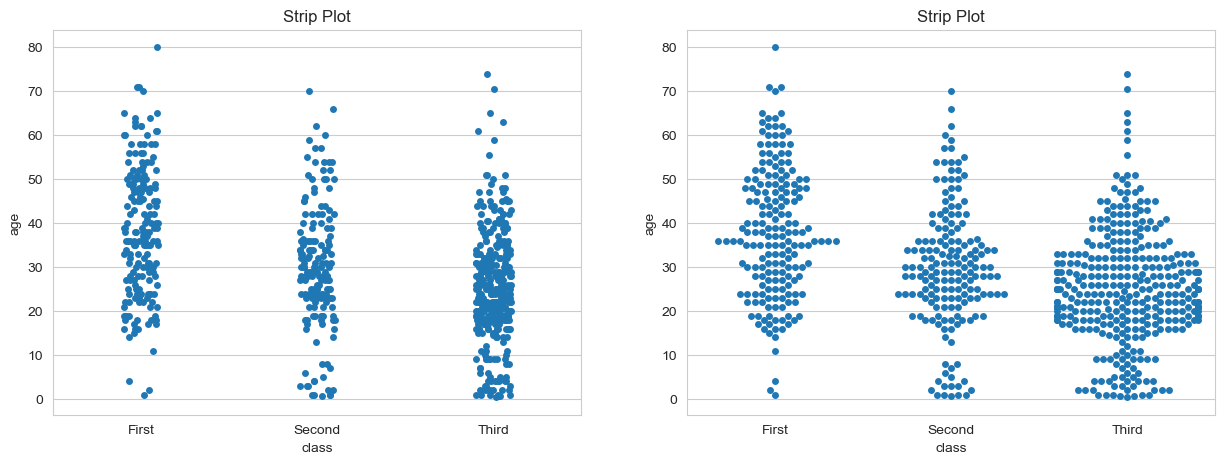

In [5]:
titanic = sns.load_dataset('titanic')
# 스타일 테마 설정(5가지 : darkgrid, whitegrid, dark, white, ticks)
sns.set_style('whitegrid')

# 그래프 객체 생성
fig = plt.figure(figsize = (15,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

# 이산형 변수의 분포 - 데이터 분산 미고려 (중복 표시 o)
sns.stripplot(x='class', y='age', 
              data=titanic, ax= ax1)
# 이산형 변수의 분포 - 데이터 분산 미고려 (중복 표시 x)
sns.swarmplot(x='class', y='age', 
              data=titanic, ax= ax2)

ax1.set_title('Strip Plot')
ax2.set_title('Strip Plot')

plt.show()

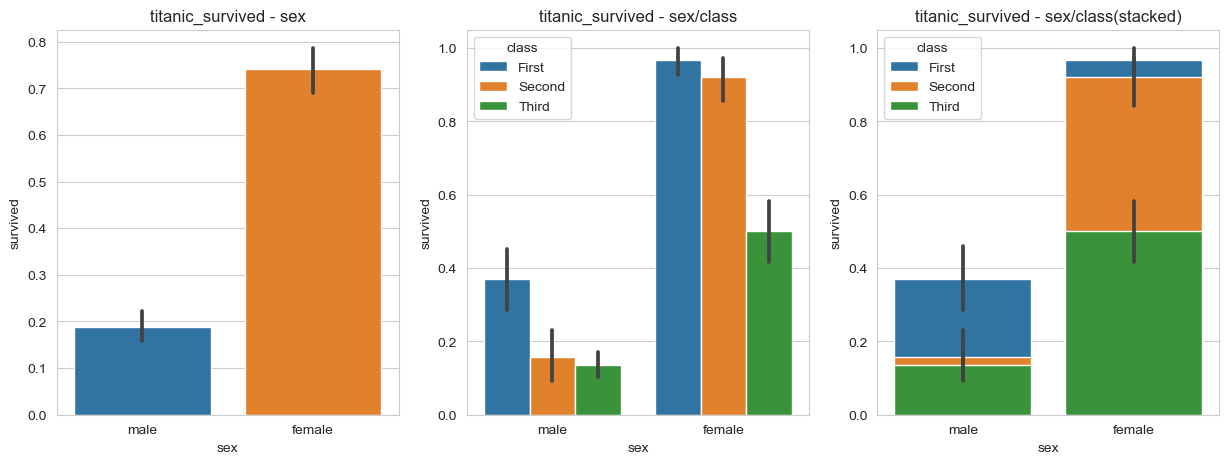

In [6]:
# 기본 설정, hue 옵션 추가, 축 방향으로 hue 변수를 분리하지 않고 위로 쌓아 올리는 누적 그래프
fig = plt.figure(figsize = (15,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)
# x,y축에 변수 할당
sns.barplot(x='sex', y='survived', data=titanic, ax=ax1)
# x축, y축에 변수 할당하고 hue 옵션 추가
sns.barplot(x='sex', y='survived', hue='class', data=titanic, ax=ax2)
# x축, y축에 변수 할당하고 hue 옵션을 추가하여 누적 출력
sns.barplot(x='sex', y='survived', hue='class', dodge = False,
            data=titanic, ax=ax3)
# 차트 제목 추가
ax1.set_title('titanic_survived - sex')
ax2.set_title('titanic_survived - sex/class')
ax3.set_title('titanic_survived - sex/class(stacked)')

plt.show()

In [7]:
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

# 빈도 그래프
sns.countplot(x='class', palette='Set1', data=titanic, ax=ax1)

# hue 옵션에 who 추가
sns.countplot(x='class', hue='who', palette='Set2', data=titanic, ax=ax2)

# dodge = False 옵션을 추가 (축 방향으로 분리하지 않고 누적 그래프 출력)
sns.countplot(x='class', hue='who', palette='Set3', 
              dodge=False, data=titanic, ax=ax3)

# 차트 제목 추가
ax1.set_title('titanic class')
ax2.set_title('titanic class - who')
ax3.set_title('titanic class - who(stacked)')

plt.show()

C:\Users\gyw78\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\gyw78\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\gyw78\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
 

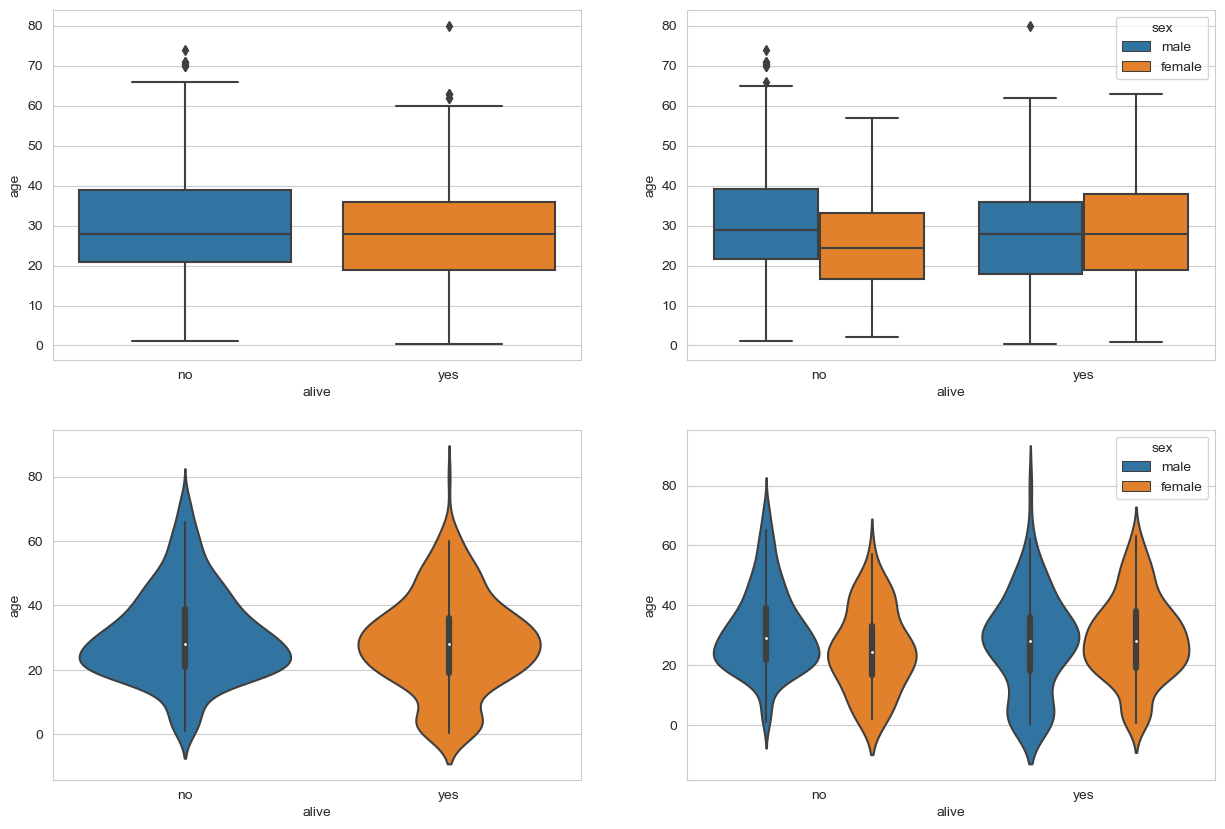

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

titanic = sns.load_dataset('titanic')
# 스타일 테마 설정(5가지 : darkgrid, whitegrid, dark, white, ticks)
sns.set_style('whitegrid')

# 그래프 객체 생성(figure에 4개의 서브 플롯 생성)
fig = plt.figure(figsize = (15,10))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

# 박스 플롯 - 기본값
sns.boxplot(x='alive', y='age', data=titanic, ax=ax1)

# 바이올린 그래프 - hue 변수 추가 
sns.boxplot(x='alive', y='age', hue='sex', data=titanic, ax=ax2)

# 박스 플롯 - 기본값
sns.violinplot(x='alive', y='age', data=titanic, ax=ax3)

# 바이올린 그래프 - hue 변수 추가 
sns.violinplot(x='alive', y='age', hue='sex', data=titanic, ax=ax4)

plt.show()

C:\Users\gyw78\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\gyw78\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\gyw78\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\gyw78\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

AttributeError: 'JointGrid' object has no attribute 'set_title'

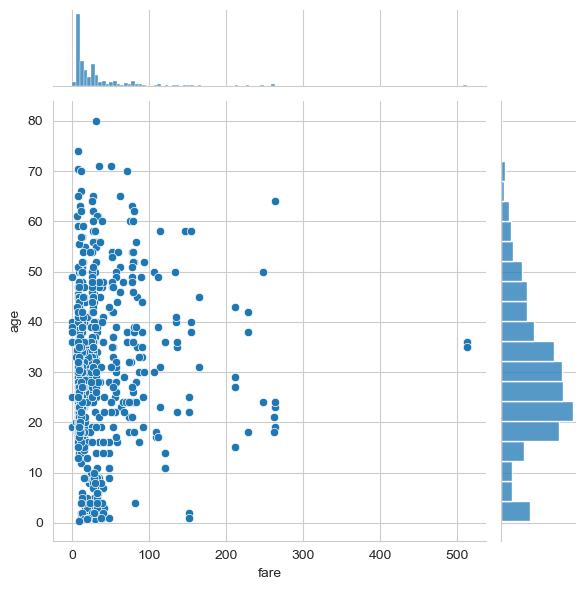

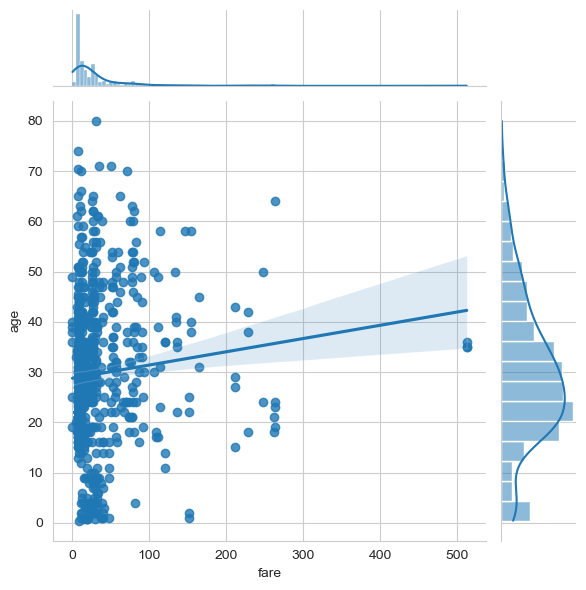

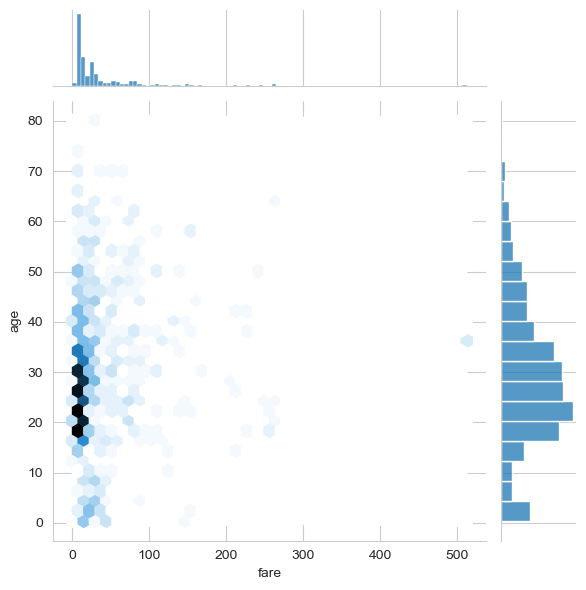

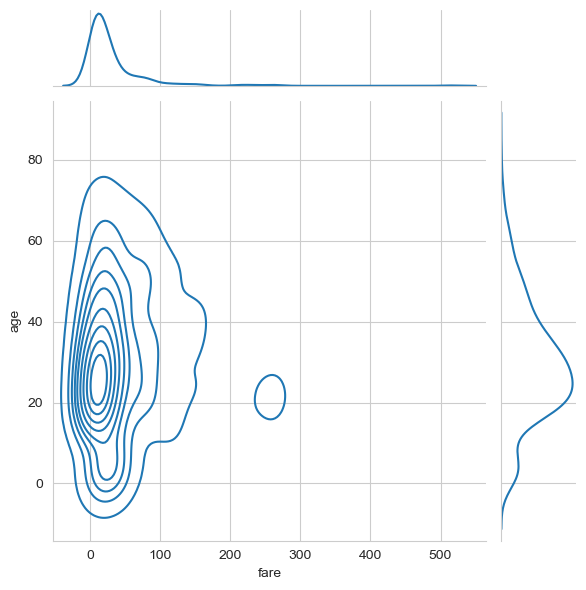

In [9]:
# 조인트 그래프

titanic = sns.load_dataset('titanic')
# 스타일 테마 설정(5가지 : darkgrid, whitegrid, dark, white, ticks)
sns.set_style('whitegrid')

j1 = sns.jointplot(x='fare', y='age', data=titanic)
j2 = sns.jointplot(x='fare', y='age', kind='reg', data=titanic) # 회귀선 추가
j3 = sns.jointplot(x='fare', y='age', kind='hex', data=titanic) # 육각 산점도
j4 = sns.jointplot(x='fare', y='age', kind='kde', data=titanic) # 커널 밀집

# 차트 제목 표시
j1.set_title('titanic fare - scatter', size=15)
j2.set_title('titanic fare - reg', size=15)
j3.set_title('titanic fare - hex', size=15)
j4.set_title('titanic fare - kde', size=15)

plt.show()

In [ ]:
# 조건을 적용하여 화면을 그리드로 분할
titanic = sns.load_dataset('titanic')
# 스타일 테마 설정(5가지 : darkgrid, whitegrid, dark, white, ticks)
sns.set_style('whitegrid')
# 조건에 따라 그리드 나누기
g=sns.FacetGrid(data=titanic, col='who', row='survived')
# 그래프 적용하기
g=g.map(plt.hist,'age')

In [ ]:
# 이변수 데이터의 분포
titanic_pair = titanic[['age', 'pclass', 'fare']]
# 3개의 열을 사용하으로 3x3 총 9개의 그리드로 분할

# 조건에 따라 그리드 나누기
g = sns.pairplot(titanic_pair)

## Folium 라이브러리 - 지도 활용
- 세계지도 제공

In [ ]:
# p162
import folium

# 서울 지도 만들기
seoul_map = folium.Map(location=[37.55,126.98], zoom_start = 12)
# 지도를 HTML로 저장
seoul_map.save('./seoul.html')

In [ ]:
# 지도 스타일 저장하기
import folium
seoul_map1 = folium.Map(location=[37.55,126.98], tiles='Stamen Terrain',
                       zoom_start=12)
seoul_map2 = folium.Map(location=[37.55,126.98], tiles='Stamen Toner',
                       zoom_start=15)
# 흑백 스타일로 도로망을 강조해서 보여줌

# 지도를 HTML 파일로 저장
seoul_map2.save('./seoul2.html')
seoul_map3.save('./seoul3.html')

In [ ]:
# 지도에 마커 표시하기
# 대학교 리스트를 데이터 프레임으로 변환
df = pd.read_excel('C:/Users/gyw78/Desktop/ewha/3-1/esaa/과제/5674-833_4th/part4/서울지역 대학교 위치.xlsx', engine='openpyxl')
# 서울 지도 만들기
seoul_map = folium.Map(location=[37.55,126.98], tiles='Stamen Terrain',
                       zoom_start=12)
# 대학교 정보를 marker로 표시
for name, lat, lng in zip(df.index, df.위도, df.경도) :
    folium.Marker([lat, lng], popup=name).add_to(seoul_map)

# 지도를 html 파일로 저장하기
seoul_map.save('./seoul_colleges.html')

In [ ]:
# 원형 마커 표시
for name, lat, lng in zip(df.index, df.위도, df.경도) :
    folium.CircleMarker([lat, lng], radius=10, color='brown', 
                        fill=True, fill_color='coral', 
                        fill_opacity=0.7, popup=name).add_to(seoul_map)

# 지도를 html 파일로 저장하기
seoul_map.save('./seoul_colleges2.html')

In [ ]:
# 지도 영역에 단계구분도 표시하기

# 경기도 인구변화 데이터를 불러와서 df로 변환
file_path = 'C:/Users/gyw78/Desktop/ewha/3-1/esaa/과제/5674-833_4th/part4/경기도인구데이터.xlsx'
df = pd.read_excel(file_path, index_col = '구분', engine='openpyxl')
df.columns = df.columns.map(str)

# 경기도 시군구 경계 정보를 가진 geo-json 파일 불러오기 
geo_path = 'C:/Users/gyw78/Desktop/ewha/3-1/esaa/과제/5674-833_4th/part4/경기도행정구역경계.json'
try : 
    geo_data = json.load(open(geo_path, encoding='utf-8'))
except : 
    geo_data = json.load(open(geo_path, encoding='utf-8-sig'))

# 경기도 지도 만들기
g_map = folium.Map(location=[37,5502, 126.982], 
                   tiles='Stamen Terrain', zoom_start=9)

# 출력할 연도 선택 (2007-2017)
year = '2007'

# choropleth 클래스로 단계 구분도 표시
folium.Choropleth(geo_data = geo_data,
                  data = df[year], columns=[df.index, df[year]],
                  fill_color='YlOrRd', fill_opacity=0.7, line_opacity=0.3,
                  threshold_scale=[10000,100000,300000,500000,700000],
                  key_on = 'feature.properties.name',
                 ).add_to(g_map)
# 지도를 html 파일로 저장하기
seoul_map.save('./gyonggi_population_' + year + '.html')